# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

### Ejercicio 1.1

In [161]:
import numpy as np
import pandas as pd


In [162]:
def f(x) :
    return np.exp(x)*np.log(x)

N = 100000
np.random.seed(0)
u = np.random.rand(N)

np.mean(f(u))



-1.3194737881596352

In [163]:
N = np.logspace(1,5,5)

table1 = pd.DataFrame(columns=["Aproximación", "Error"],index = N)
table1


,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [164]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)


In [165]:
for i in N : 
    table1.loc[i, "Aproximación"] = montecarlo(f,int(i),1,3)
    
table1


,Aproximación,Error
10.0,11.987386,NaN
100.0,15.536536,NaN
1000.0,14.134471,NaN
10000.0,14.230916,NaN
100000.0,14.104029,NaN


In [166]:
table1["Error"] = np.abs((14.02750293404155) - table1["Aproximación"])

table1


,Aproximación,Error
10.0,11.987386,2.040117
100.0,15.536536,1.509033
1000.0,14.134471,0.106968
10000.0,14.230916,0.203413
100000.0,14.104029,0.076526


### Ejercicio 1.2

In [167]:
def f(x) :
    return np.sin(x)*np.log(x)

N = 100000
np.random.seed(0)
u = np.random.rand(N)

np.mean(f(u))


-0.23966727812667435

In [168]:
N = np.logspace(1,5,5)

table2 = pd.DataFrame(columns=["Aproximación", "Error"],index = N)
table2


,Aproximación,Error
10.0,NaN,NaN
100.0,NaN,NaN
1000.0,NaN,NaN
10000.0,NaN,NaN
100000.0,NaN,NaN


In [169]:
def montecarlo(f, N, a, b) :
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)



In [170]:
for i in N : 
    table2.loc[i, "Aproximación"] = montecarlo(f,int(i),1,3)
    
table2


,Aproximación,Error
10.0,0.859213,NaN
100.0,0.883222,NaN
1000.0,0.857109,NaN
10000.0,0.868573,NaN
100000.0,0.870867,NaN


In [171]:
table2["Error"] = np.abs((0.8698437855615033) - table2["Aproximación"])

table2


,Aproximación,Error
10.0,0.859213,0.010631
100.0,0.883222,0.013378
1000.0,0.857109,0.012735
10000.0,0.868573,0.00127
100000.0,0.870867,0.001023


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [172]:
def montecarlo2(region,ax,bx,ay,by,N):
    x = np.random.uniform(ax,bx,N)
    y = np.random.uniform(ay,by,N)
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return ((x**2+2*y**2) <= (-2*x+8*y-7))

In [173]:
n = np.logspace(1,5,5)

tabla = pd.DataFrame(columns = ["Aproximación","Error Relativo"], index = n)

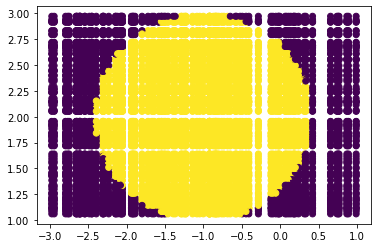

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = -3
bx = 1
ay = 1
by = 3

x = np.random.uniform(-3,1,100)
y = np.random.uniform(1,3,100)
X,Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X,Y, c= bernoulli(X,Y))


In [175]:
ax = -3
bx = 1
ay = 1
by = 3

for i in n:
    tabla.loc[i,"Aproximación"]= montecarlo2(bernoulli,ax,bx,ay,by,int(i))
    
tabla


,Aproximación,Error Relativo
10.0,4.8,NaN
100.0,4.88,NaN
1000.0,4.44,NaN
10000.0,4.3848,NaN
100000.0,4.44456,NaN


In [176]:
AR = (bx-ax)*(by-ay)
for i in n:
    AD = tabla["Aproximación"][i]
    c_rel= np.sqrt((1-(AD/AR))/(AD/AR))
    tabla["Error Relativo"][i] = c_rel 
    
tabla 
    

,Aproximación,Error Relativo
10.0,4.8,0.816497
100.0,4.88,0.79959
1000.0,4.44,0.895434
10000.0,4.3848,0.908011
100000.0,4.44456,0.894401


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Ingeniería Civil

1. Se utiliza la integración Montecarlo para analizar los esfuerzos originados por las cargas vivas que circulan actualmente y se puede asimismo desarollar una predicción de un plazo determinado. Para esto se utilizan varias tasas de crecimiento anual, con el objetivo de analizar el desempeño estructural. Con varios elementos, los cuales son: la generación de las distribuciones estadísticas de la composición vehicular, el peso vehicular, el porcentaje de ocupación en un puente dado y un algoritmo para generar escenarios aleatorios, se puede generar una simulación y obtener las distribuciones estadísticas de los esfuerzos. 

2. Se puede calcular el área de un volumen determinado, esto se pude aplicar directamente a la ingeniería civil, ya que podemos calcular el área de un espacio el cual puede llegar a ser un poco irregular o dificil de calcular. 

3. Se utilizan los métodos de Monte Carlo para asegurar que múltiples partes de un ensamblaje encajen en un modelo o construcción. Dichos ensambles pueden ser de pequeño o gran tamaño. Esto ayuda a modelar un espacio en donde se pueda asegurar que dichos ensambles cuadran y de dicha manera se reduce el desperdicio. 